In [1]:
# set up:

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import scanpy.external as sce
import os
import scipy.sparse as ssp
import sys

# !!!!
# Change this path to point to folder containing helper_functions.py
sys.path.append('/Users/kalki/Dropbox (HMS)/PhD_lab/SPRING_dev/data_prep/')
import helper_functions_py3 as hf

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures

/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/Users/kalki/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [4]:
# load reference data (Wagner et at 2018):
adata_dan = sc.read('/Users/kalki/Dropbox (HMS)/PhD_lab/0.projects/cell_cycle/Dan_zfish_data_new/adata_dan.h5ad')

# load your data:
adata_indrops5 = sc.read('../../../4.Indrops5/data/anndata_objects/adata_indrops5_brep123_trep1.h5ad')


In [5]:
# subset data by time point of interest:
adata14 = adata_indrops5[adata_indrops5.obs.time_point == '14']
adata14_dan = adata_dan[adata_dan.obs.time_point == 14]
adata14_dan = adata14_dan

/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [6]:
adata14_raw = adata14.copy()

In [7]:

# cell cycle and house keeping genes 
cc_genes_dan = ['cdk1','mcm2','mcm7','rrm2','cenpa', 'cdc6', 'ccnf', 'cdca4','ccnd1', 'kif4']

house_keeping = ['hmgb1b', 'hmgb3a', 'hspd1', 'hspa9', 'rplp0', 'hnrnpaba', 'rps2',
                  'rps12', 'rpl12', 'rps13', 'rps14', 'rps15a','rpl10', 'rps3a', 
                  'rpl31', 'rpl37', 'rps6', 'rpl9', 'rpl11', 'rpl34', 'rpl13', 
                  'rpl36a', 'rpl26', 'rps8a', 'rpl21','rps27.1','rpl27a', 'cirbpb']


cc_hk_genes = cc_genes_dan + house_keeping

# classify data:
states14_non_coarsegrained = hf.classifier_pca(adata14_dan.copy(), np.array(adata14_dan.obs.state) ,
                                               adata14.copy(),classifier = hf.softmax_regression, 
                                               genes_to_remove=True, ncomponents=50, unimportant_genes = cc_hk_genes)





normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 1908 genes that are detected in less than 3 cells
extracting highly variable genes


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00)
5117 genes passing filter


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


first iteration of searching unimportant genes done
second iteration of searching unimportant genes done
normalizing by total count per cell


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/kalki/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
# process data and make umap:
adata14.raw, adata14 = hf.process_data(adata14.copy(), unimportant_genes = cc_hk_genes, ncomponents = 50,
                                   batch_correction = True, batch_key='replicate' )

normalizing by total count per cell


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
filtered out 2118 genes that are detected in less than 3 cells


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


extracting highly variable genes
    finished (0:00:00)
4827 genes passing filter


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


first iteration of finding unimportant genes done
second iteration of finding unimportant genes done


/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/kalki/.local/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:913: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA with n_comps = 50
    finished (0:00:08)
computing batch balanced neighbors
	finished (0:00:02)
computing UMAP
    finished (0:00:10)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01)


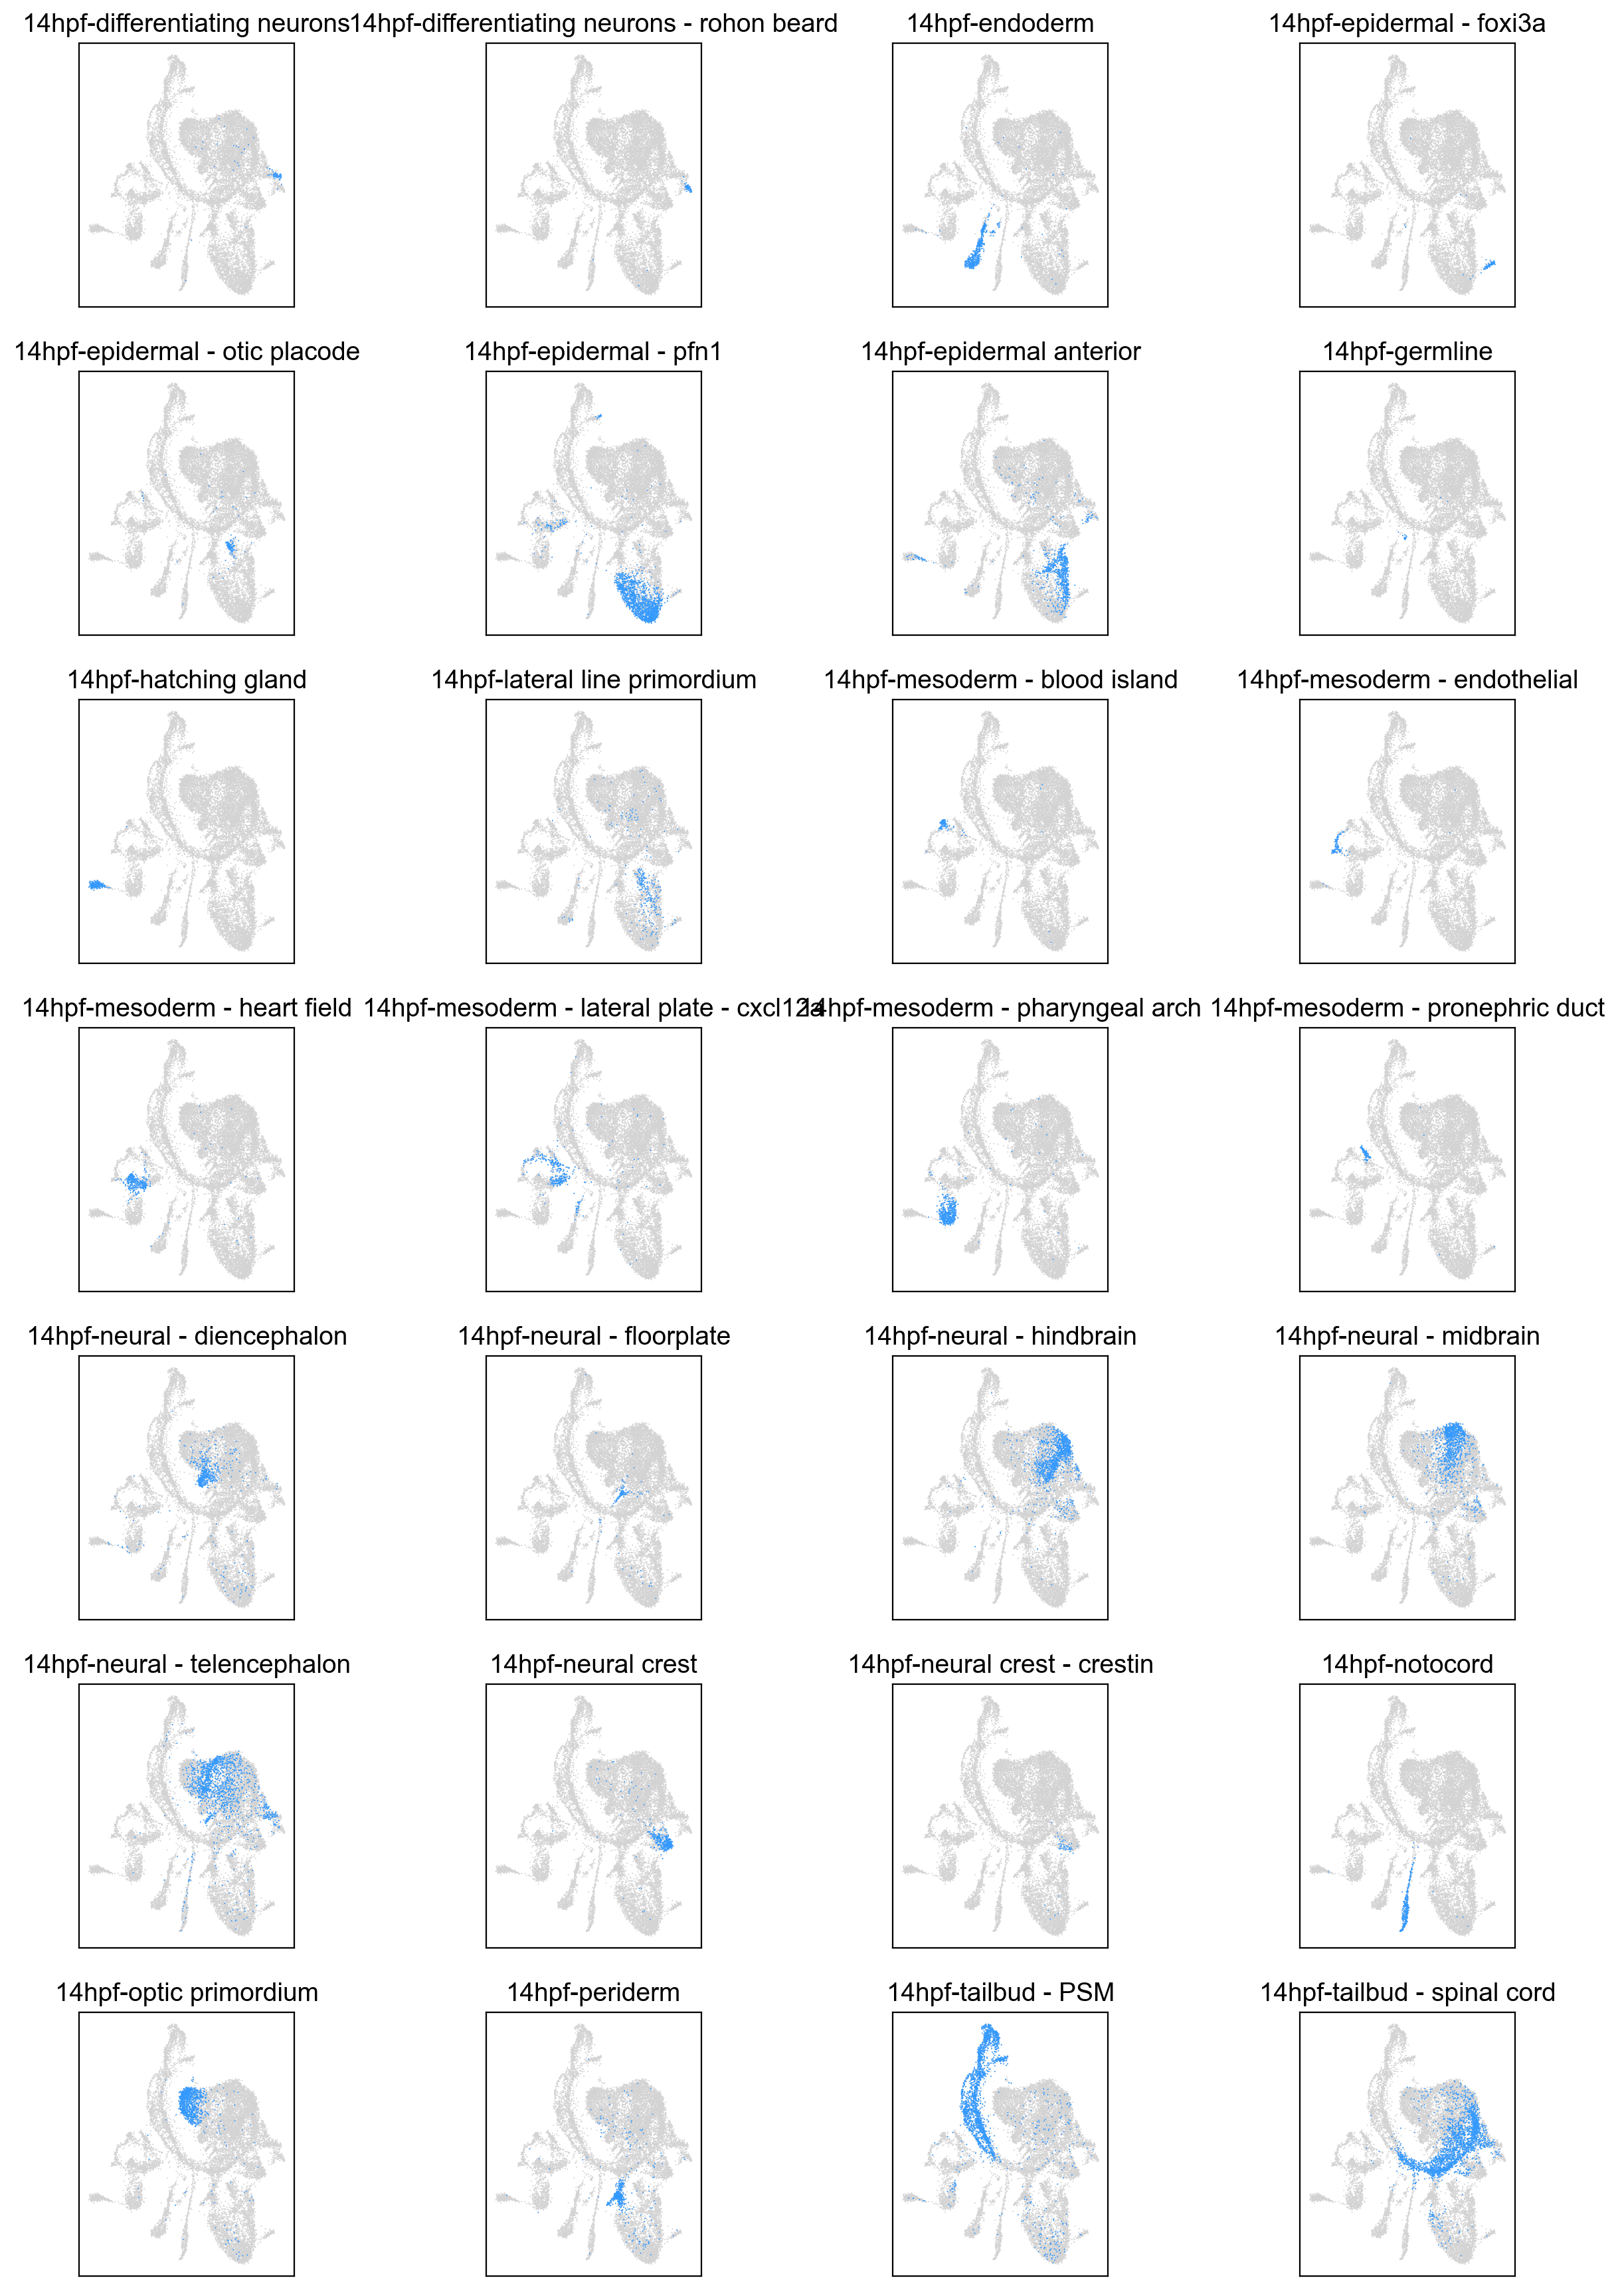

In [9]:
# plot states:

fig,nrow,ncol = hf.start_subplot_figure( len(set(states14_non_coarsegrained)), row_height=2.5, n_columns=4, fig_width=12, dpi=100)


umap14 = adata14.obsm['X_umap']
state_list = np.array(list(set(states14_non_coarsegrained)))
state_list.sort()

for i,state_name in enumerate(state_list):
    ax = fig.add_subplot(nrow, ncol, i+1)
    ax.scatter(umap14[:,0],umap14[:,1], color = 'lightgray', s = 0.5, edgecolor = 'none')
    ax.scatter(umap14[:,0][states14_non_coarsegrained==state_name],
               umap14[:,1][states14_non_coarsegrained==state_name],color = '#3399FF', s = 0.5, edgecolor = 'none')
    ax.set_title(state_name)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
pl.tight_layout()

In [10]:
# club these cell states into fewer cell states (Table S1 of the manuscript contains corresponding between Wagner et al states and our states):
cell_cycle_path = '/Users/kalki/Dropbox (HMS)/PhD_lab/0.projects/cell_cycle/'

coarse_graining14_pd = pd.read_excel(cell_cycle_path+ 'parent_daughter14_18_24.xlsx', 
                                     sheet_name = '14hpf_coarsegrain', header=None)

coarse_graining14_dict = {coarse_graining14_pd[0][i]:coarse_graining14_pd[1][i]
                        for i in range(coarse_graining14_pd.shape[0])}

states14 = states14_non_coarsegrained
states14_coarsegrain = np.zeros(states14.shape[0], dtype = object)
for i, states in enumerate(states14):
    states14_coarsegrain[i] = coarse_graining14_dict[states]


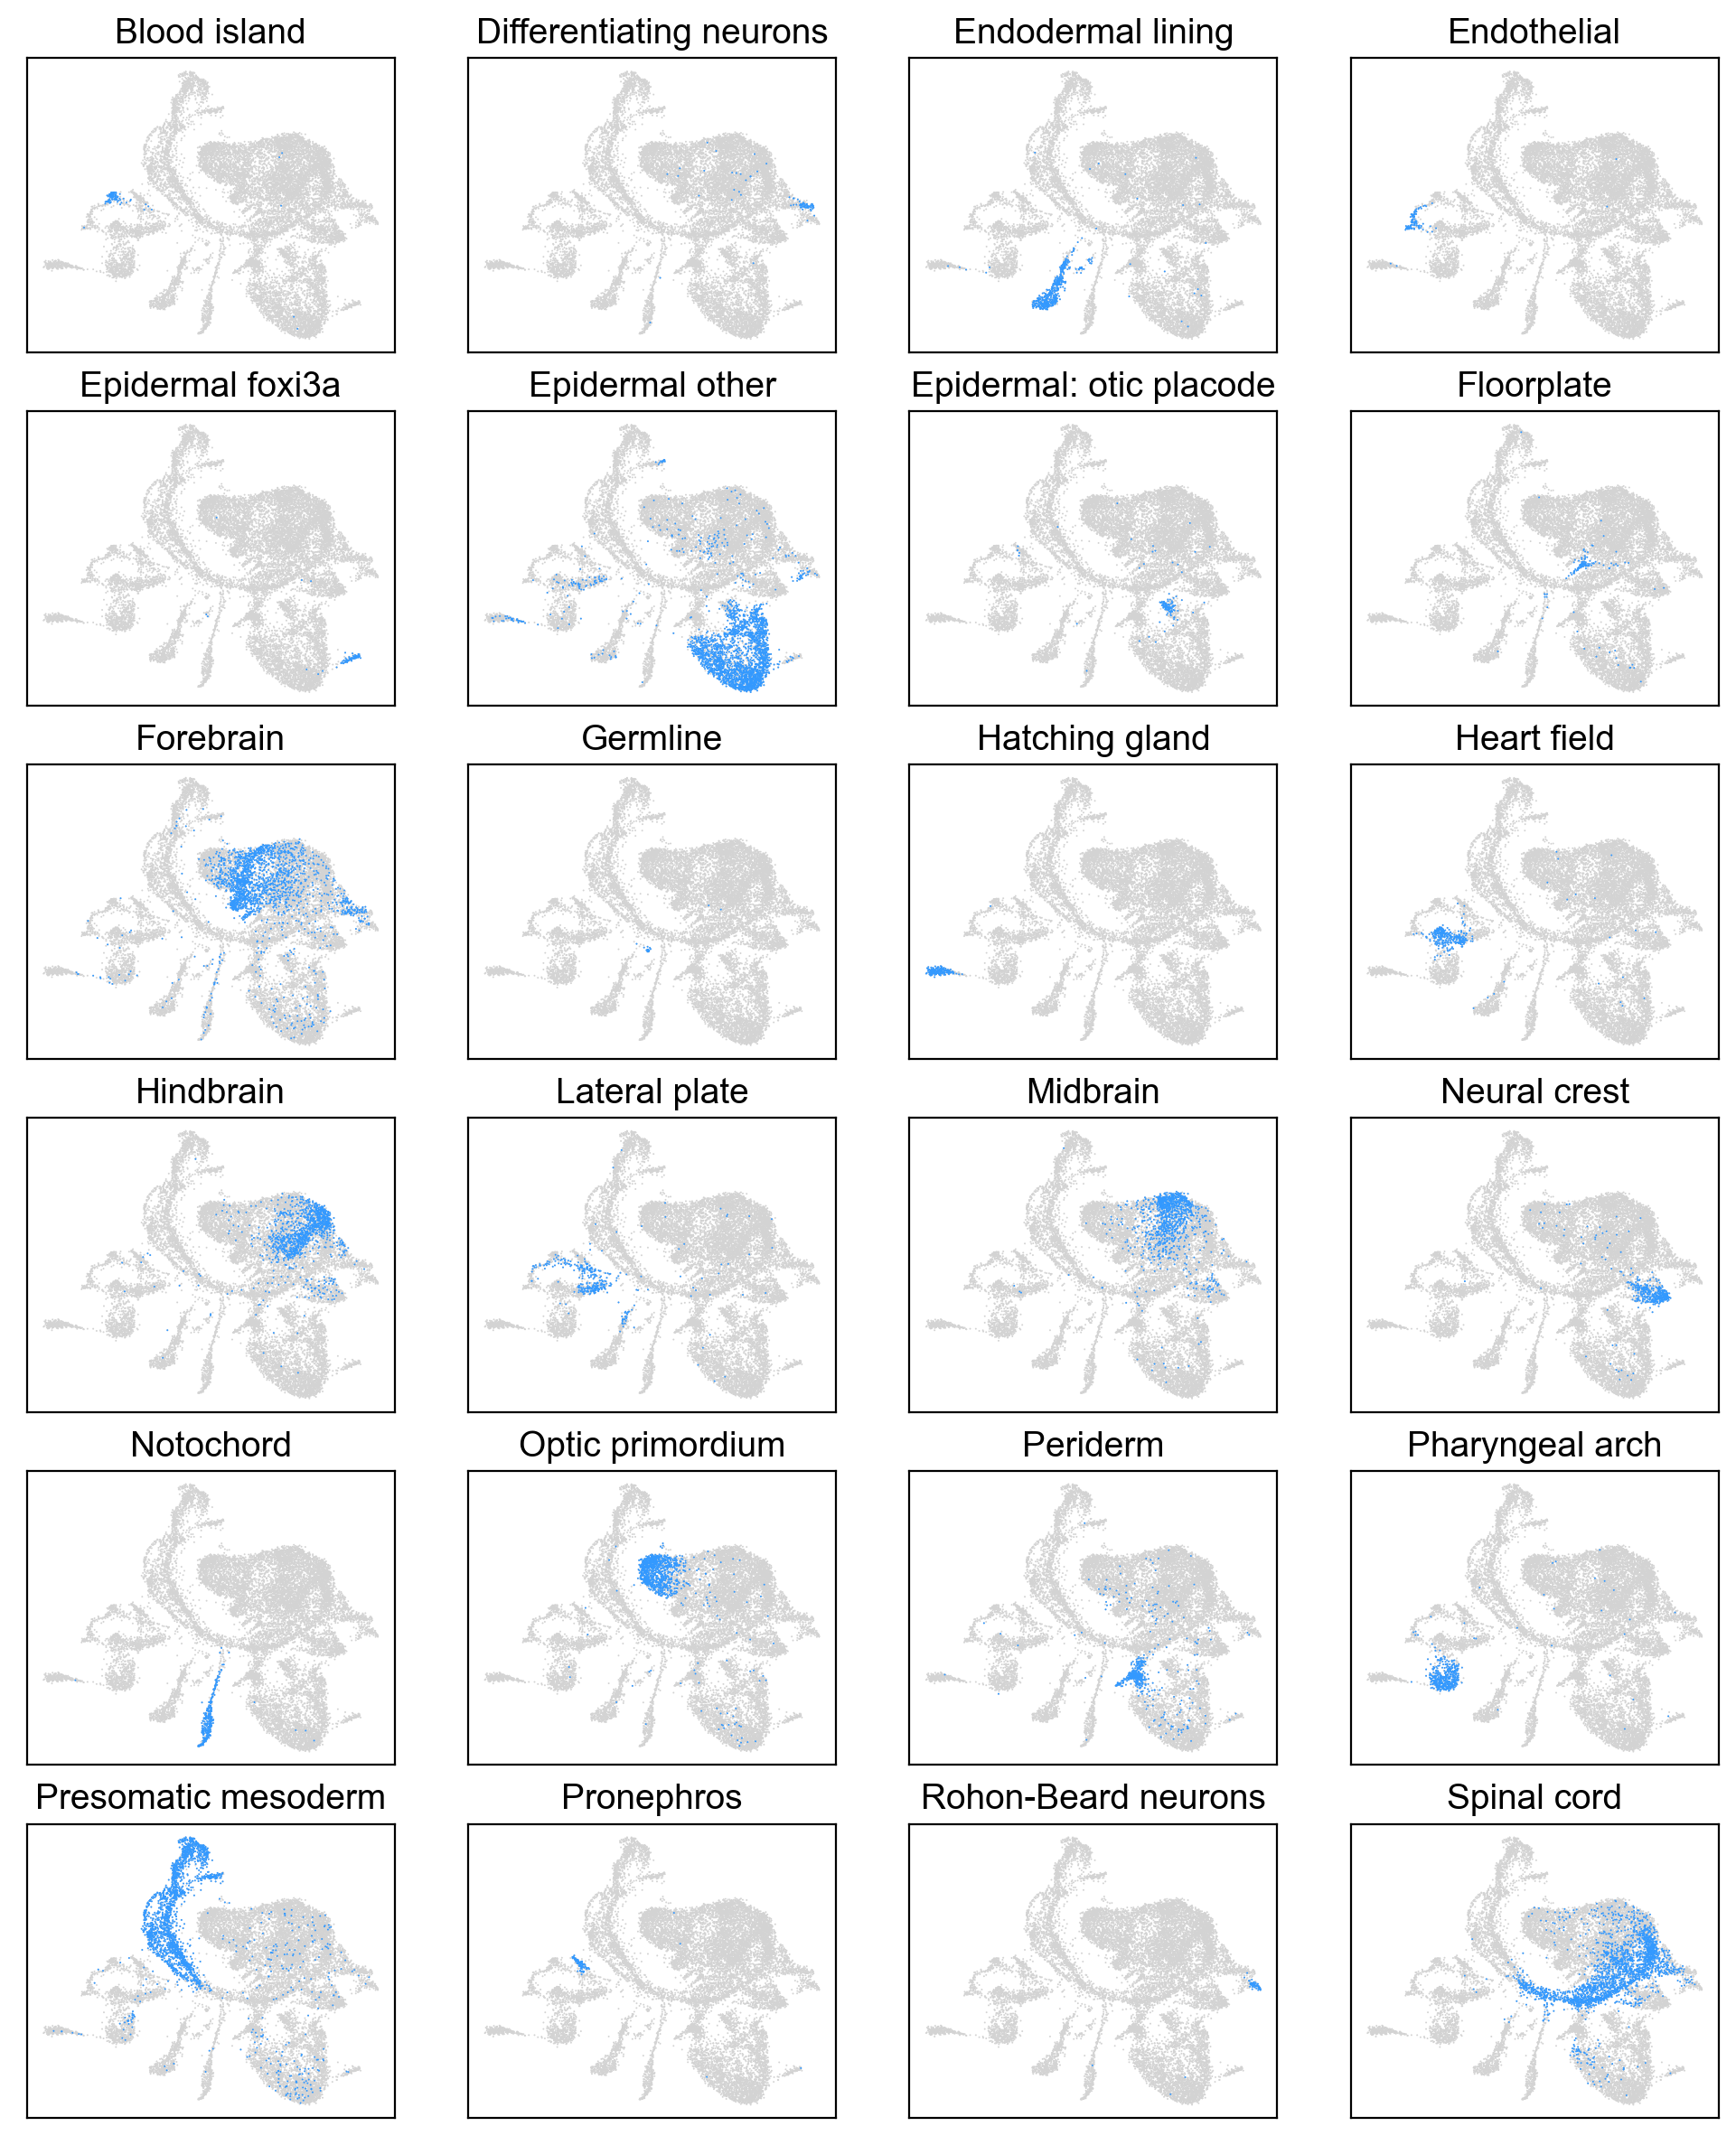

In [12]:
# plot states:

fig,nrow,ncol = hf.start_subplot_figure( len(set(states14_coarsegrain)), row_height=2.5, n_columns=4, fig_width=12, dpi=100)


state_list = np.array(list(set(states14_coarsegrain)))
state_list.sort()

for i,state_name in enumerate(state_list):
    ax = fig.add_subplot(nrow, ncol, i+1)
    ax.scatter(umap14[:,0],umap14[:,1], color = 'lightgray', s = 0.5, edgecolor = 'none')
    ax.scatter(umap14[:,0][states14_coarsegrain==state_name],
               umap14[:,1][states14_coarsegrain==state_name],color = '#3399FF', s = 0.5, edgecolor = 'none')
    ax.set_title(state_name)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
# clean up annotations - cells get the annotation of their neighoring cells:
# we first find 10 nearest neighbor and then each cell gets the annotation which is assigned to majority of its neighors

# find 10 nearest neighboring states:

from sklearn.neighbors import *

neighbors = NearestNeighbors(n_neighbors=10).fit(adata14.obsm['X_pca'])
knn_dist, knn_neigh = neighbors.kneighbors(adata14.obsm['X_pca'], return_distance=True)
neighbors14 =states14_coarsegrain[knn_neigh]

In [14]:
# count number of neighbors for each type of states 

from collections import Counter
neighbor_counters = []
for i in range(neighbors14.shape[0]):
    neighbor_counters = neighbor_counters + [dict(Counter(neighbors14[i]))]


(array([  58.,  490., 1008., 1286.,    0., 1311., 1244., 1407., 2001.,
        7707.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

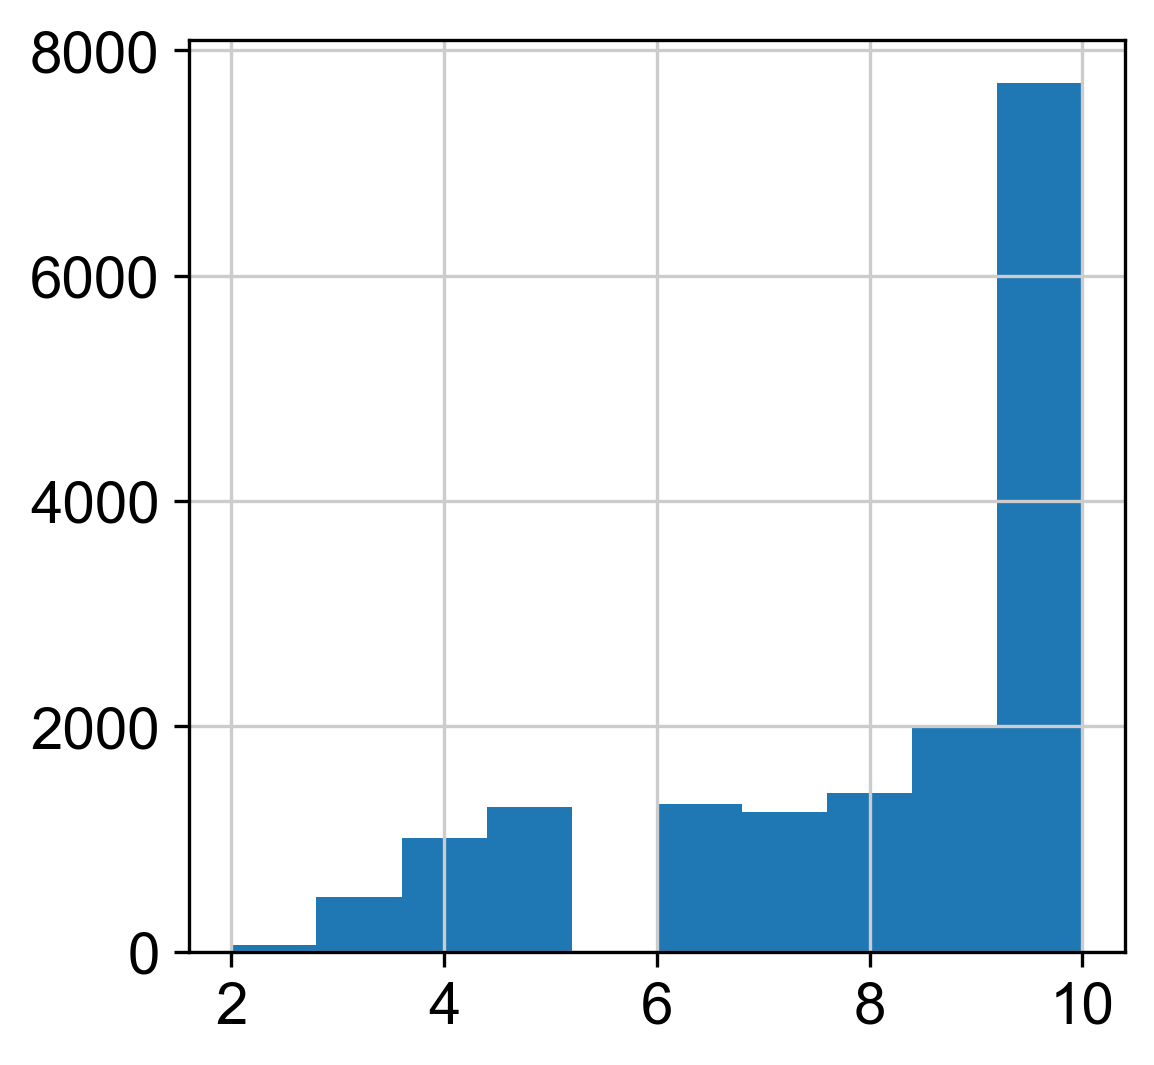

In [15]:
# see how the maxcounts are distributed:

max_counts = np.zeros(len(neighbor_counters))

for i,elements in enumerate(neighbor_counters):
    max_counts[i] = max(elements.values())

pl.hist(max_counts, bins = 10)

In [16]:
# assign new states based on neighboring state:

states14_coarsegrain_new = states14_coarsegrain.copy()

for i,x in enumerate(neighbor_counters):
        for k in x.keys():
            if x[k] == max_counts[i]:
                states14_coarsegrain_new[i] = k


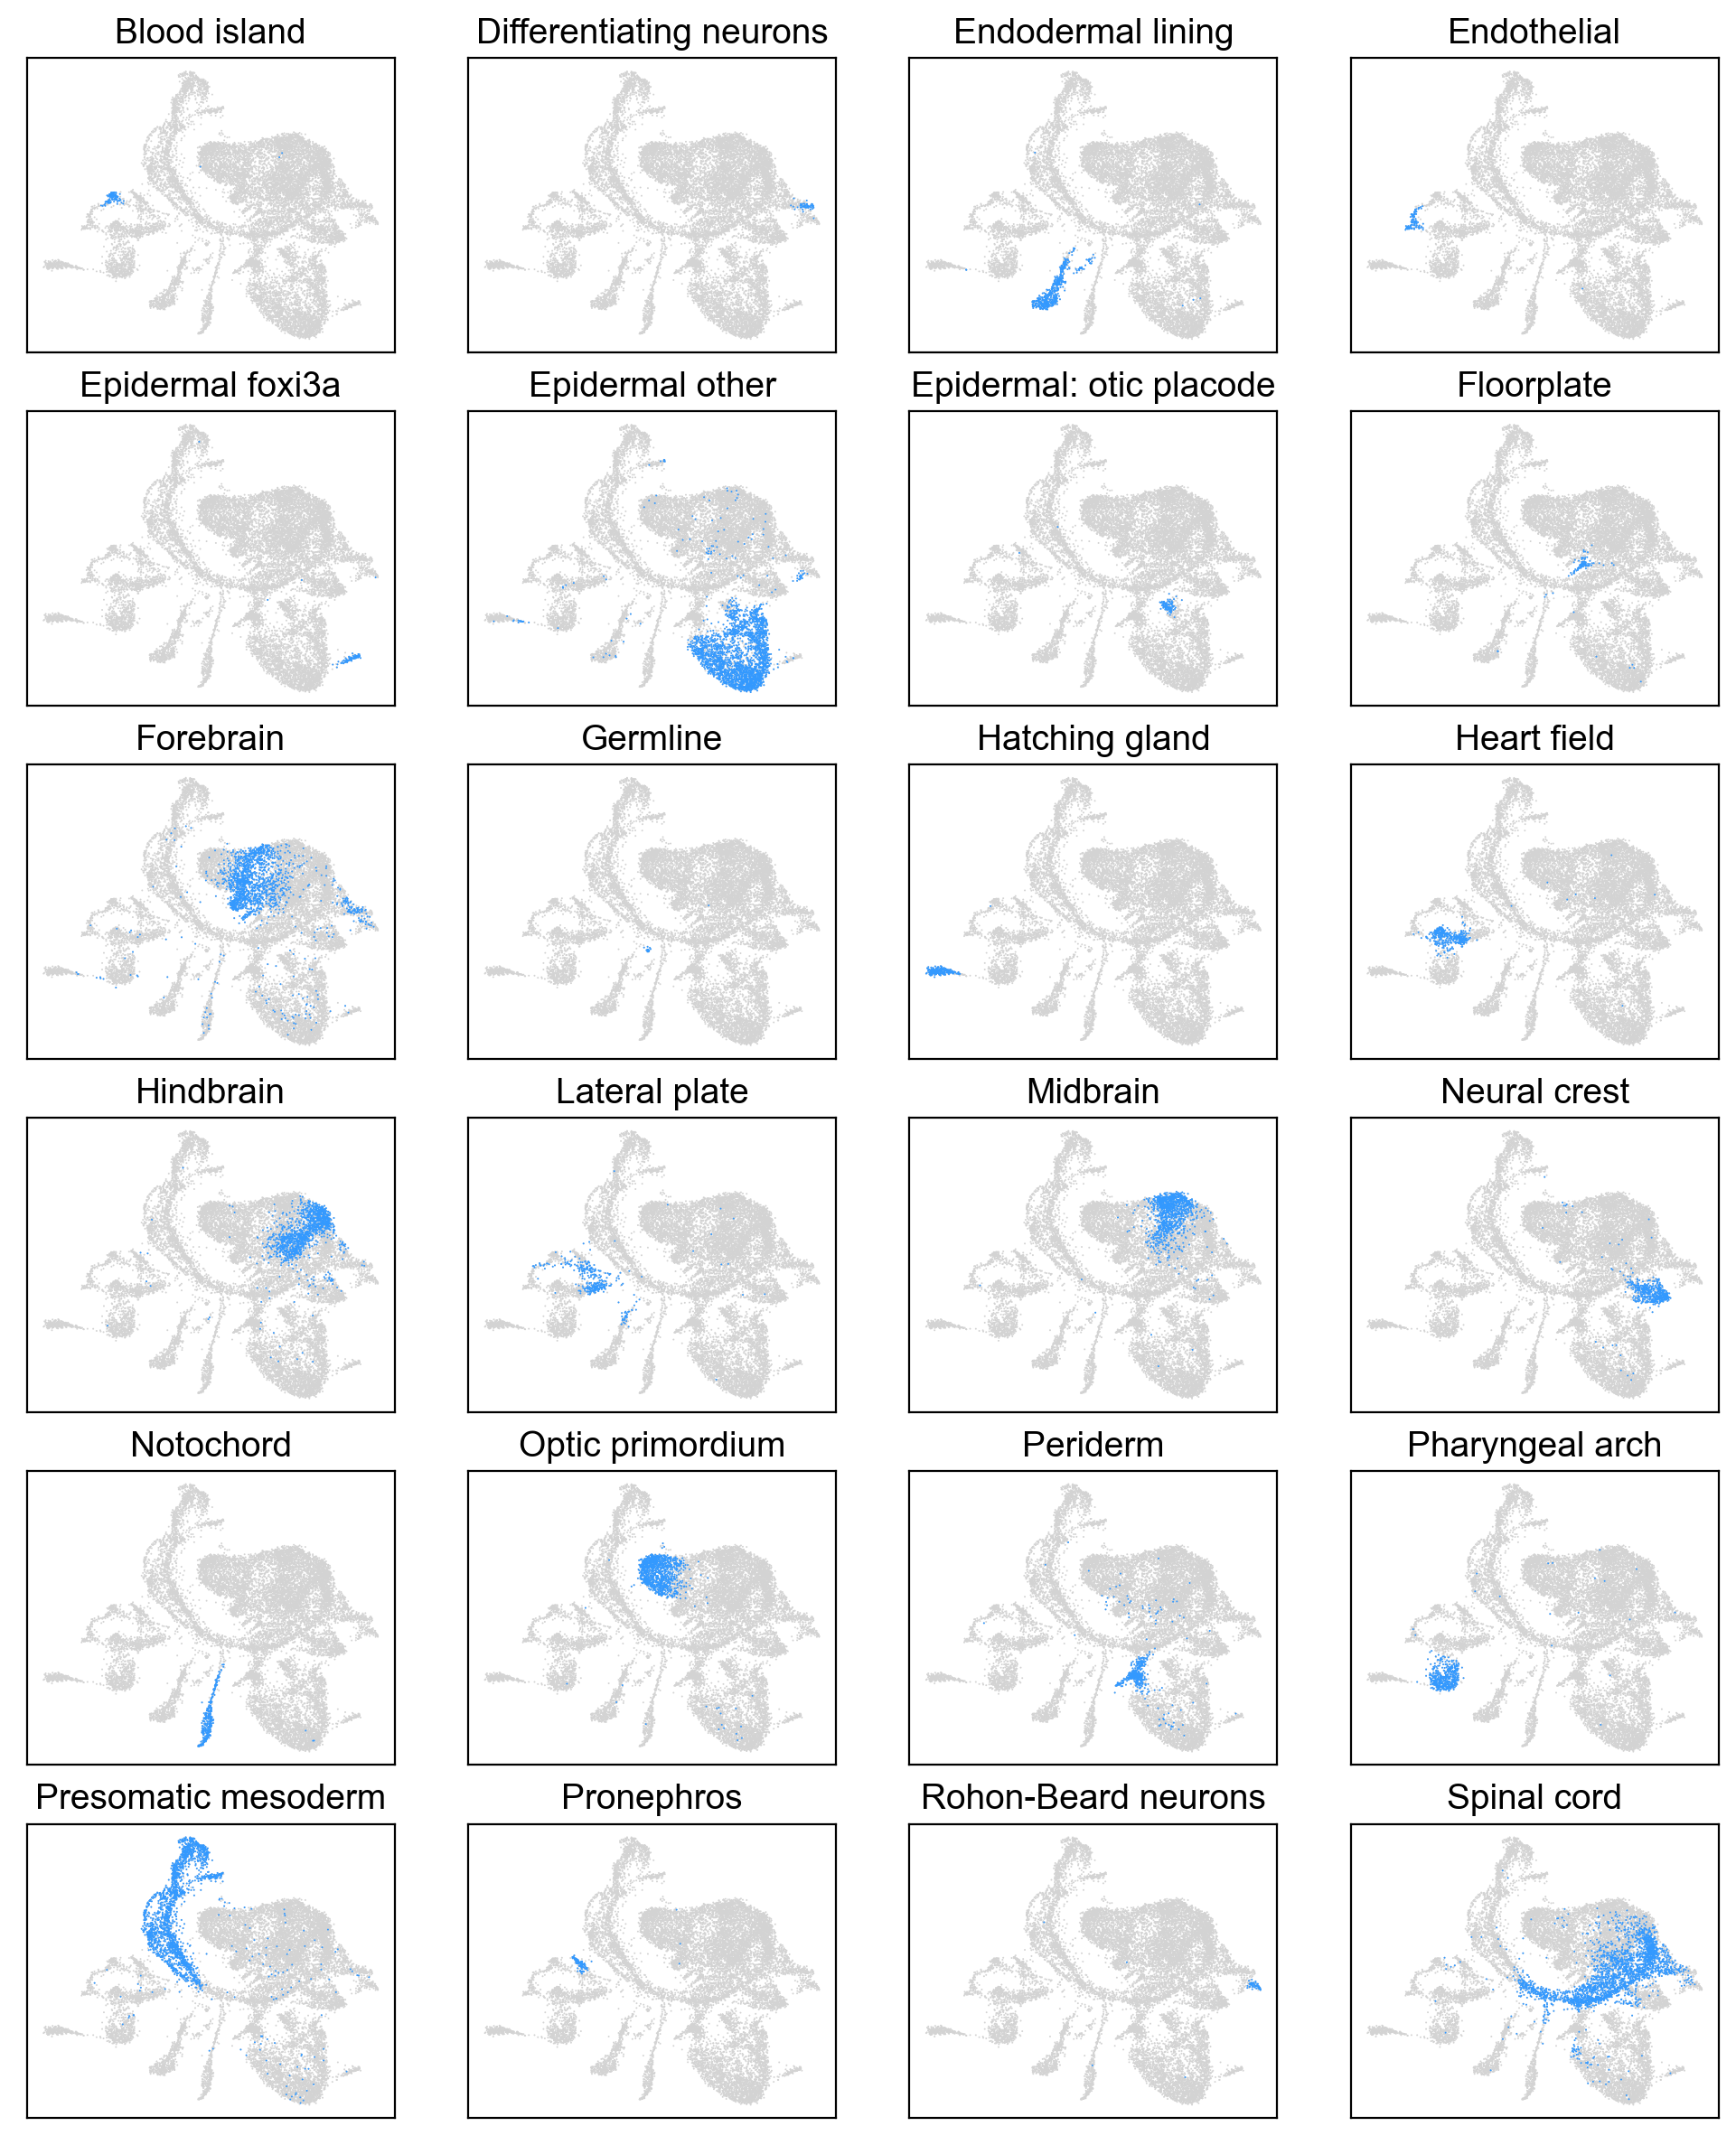

In [17]:
# plot cleaned states:

fig,nrow,ncol = hf.start_subplot_figure( len(set(states14_coarsegrain_new)), row_height=2.5, n_columns=4, fig_width=12, dpi=100)


umap14 = adata14.obsm['X_umap']
state_list2 = np.array(list(set(states14_coarsegrain_new)))
state_list2.sort()

for i,state_name in enumerate(state_list2):
    ax = fig.add_subplot(nrow, ncol, i+1)
    ax.scatter(umap14[:,0],umap14[:,1], color = 'lightgray', s = 0.5, edgecolor = 'none')
    ax.scatter(umap14[:,0][states14_coarsegrain_new==state_name],
               umap14[:,1][states14_coarsegrain_new==state_name],color = '#3399FF', s = 0.5, edgecolor = 'none')
    ax.set_title(state_name)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [18]:
# save data with cell state annotations:

adata14_raw.obs['state_v3'] = states14_coarsegrain_new
adata14.obs['state_v3'] = states14_coarsegrain_new

adata14_raw.write_h5ad('../../data/anndata_objects/adata14_raw.h5ad')
adata14.write_h5ad('../../data/anndata_objects/adata14_processed.h5ad')



/Users/kalki/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1154: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'state_v3' as categorical
... storing 'state_v3' as categorical
